<a href="https://colab.research.google.com/github/vomicienta/DataScience/blob/main/ProyectoDS_ParteI_Cignola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Investigación de Exoplanetas - Telescopio Espacial Kepler
Kepler es un observatorio que buscaba planetas extrasolares, de tamaño similar a la Tierra que se encuentran en la zona de habitabilidad de su estrella (Exoplanetas Habitables), llevando a cabo lo que se conoce como **misión Kepler**. Lanzado por la NASA el 6 de marzo de 2009. El 15 de agosto de 2013 se dio por finalizada la misión principal y en noviembre de 2013 el inicio de la misión extendida K2. El 30 de octubre de 2018, tras nueve años de operación, la NASA anunció su retiro.

El nombre es una dedicatoria al astrónomo y matemático Johannes Kepler (1571-1630), descubridor de las tres leyes que describen las características de las órbitas planetarias.

De Wikipedia

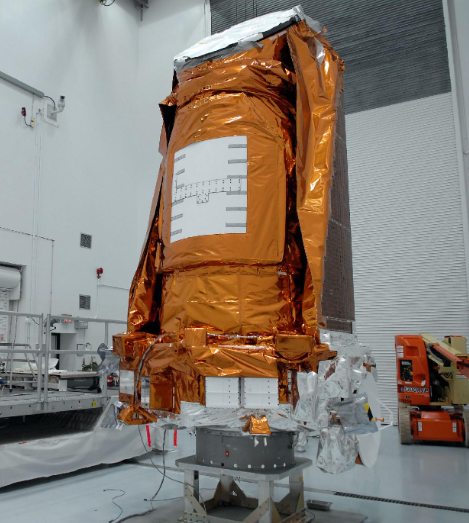

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#se importa el set de datos
url = 'https://raw.githubusercontent.com/vomicienta/DataScience/main/exoplanets.csv'

In [4]:
exop = pd.read_csv('https://raw.githubusercontent.com/vomicienta/DataScience/main/exoplanets.csv', sep =",")
exop.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [5]:
# Inicialmente tenemos 9564 filas y 49 columnas
exop.shape

(9564, 49)

In [6]:
exop.columns

Index(['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

#Observemos las columnas - en el paso siguiente las renombraremos para que respeten las denominaciones iniciales de su origen:
https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html

0 - kepid: KepID - Key/Index

1 - kepoi_name: KOI Name - Nombre asignado al objeto de Interés (KEPLER OBJECT OF INTEREST)

2 - kepler_name: Kepler Name - Nombre asignado al objeto **validado** como Exoplaneta (Puede no ser una estrella)

3 - koi_disposition: Exoplanet Archive Disposition - Los valores son CANDIDATO / FALSO POSITIVO / NO DISPOSICIONADO o CONFIRMADO.

4 - koi_pdisposition: Disposition Using Kepler Data - Los valores típicos son FALSO POSITIVO, NO DISPOSICIONADO y CANDIDATO. Puede cambiar a traves del tiempo dependiendo las investigaciones que se realizen sobre el objeto.

5 - koi_score: Disposition Score - Valor del 0 al 1 indicando tendencia, aquellos con disposición de candidatos serán tendientes a/ó 1, falsos positivos con alto valor no indicarán confianza.

6 - koi_fpflag_nt: Not Transit-Like Flag - Un KOI cuya curva de luz no es consistente con la de un planeta en tránsito/orbitando.

7 - koi_fpflag_ss: 	Stellar Eclipse Flag - KOI que se observa que tiene un evento secundario significativo, forma de tránsito o variabilidad fuera del eclipse, probabilidad binaria eclipsante.

8 - koi_fpflag_co: 	Centroid Offset Flag - La señal proviene de una estrella cercana, como se infiere al medir la ubicación tanto dentro como fuera del tránsito, o por la intensidad de la señal de tránsito.

9 - koi_fpflag_ec: 	Ephemeris Match Indicates Contamination Flag - KOI comparte el mismo período y época que otro objeto. Se considera contaminación por flujo en la diafonía electrónica.

10- koi_period: Orbital Period (days) - El intervalo entre tránsitos planetarios. 2 Col Incertidumbres:

11- koi_period_err1: Col Incertidumbres Positiva Período Orbital

12- koi_period_err2: Col Incertidumbres Negativa Período Orbital

13- koi_time0bk: Transit Epoch - El tiempo correspondiente al día y la hora en el centro del Sistema Solar (1 Enero 2009 12 PM UTC)

14- koi_time0bk_err1: Col Incertidumbres Positiva Epoca de Transito

15- koi_time0bk_err2: Col Incertidumbres Negativa Epoca de Transito

16- koi_impact: Impact Parameter - La distancia proyectada por el cielo entre el centro del disco estelar y el centro del disco planetario en la conjunción, normalizada por el radio estelar.

17- koi_impact_err1: Col Incertidumbres Positiva Parametro Impacto

18- koi_impact_err2: Col Incertidumbres Negativa Parametro Impacto

19- koi_duration: Transit Duration (hours) - Duración de tránsitos observados. Se mide desde el primer contacto entre el planeta y la estrella hasta el último contacto.

20- koi_duration_err1: Col Incertidumbres Positiva Duracion Transito

21- koi_duration_err2: Col Incertidumbres Negativa Duracion Transito

22- koi_depth: Transit Depth (parts per million) - La fracción del flujo estelar que se pierde en el mínimo del tránsito planetario.

23- koi_depth_err1: Col Incertidumbres Positiva Profundidad de Tránsito

24- koi_depth_err2: Col Incertidumbres Negativa Profundidad de Tránsito

25- koi_prad: Planetary Radius - El radio planetario. Producto de la relación del radio de la estrella del planeta y el radio estelar.

26- koi_prad_err1: Col Incertidumbres Positiva Radio Planetario

27- koi_prad_err2: Col Incertidumbres Negativa Radio Planetario

28- koi_teq: 	Equilibrium Temperature (K°) - Aproximación de la temperatura del planeta.

29- koi_teq_err1: Col Incertidumbres Positiva Temperatura de Equilibrio

30- koi_teq_err2: Col Incertidumbres Negativa Temperatura de Equilibrio

31- koi_insol: Insolation Flux - El flujo de insolación es otra forma de dar la temperatura de equilibrio. Se da en unidades relativas a las medidas para la Tierra desde el Sol.

32- koi_insol_err1: Col Incertidumbres Positiva Flujo de Insolación

33- koi_insol_err2: Col Incertidumbres Negativa Flujo de Insolación

34- koi_model_snr: 	Transit Signal-to-Noise - Profundidad de tránsito normalizada por la incertidumbre media en el flujo durante los tránsitos.

35- koi_tce_plnt_num: TCE Planet Number - Número de Planeta TCE federado al KOI.

36- koi_tce_delivname: 	TCE Delivery Name - Nombre de entrega del TCE correspondiente a los datos del TCE federados al KOI.

37- koi_steff: Stellar Effective Temperature - La temperatura fotosférica de la estrella.

38- koi_steff_err1: Col Incertidumbres Positiva Temperatura Estelar Efectiva

39- koi_steff_err2: Col Incertidumbres Negativa Temperatura Estelar Efectiva

40- koi_slogg: Stellar Surface Gravity (log10(cm s-2) - El logaritmo de base 10 de la aceleración debida a la gravedad en la superficie de la estrella.

41- koi_slogg_err1: Col Incertidumbres Positiva Superficie Gravitatoria

42- koi_slogg_err2: Col Incertidumbres Negativa Superficie Gravitatoria

43- koi_srad: Stellar Radius - El radio fotosférico de la estrella/ Planeta Candidato.

44- koi_srad_err1: Col Incertidumbres Positiva Radio Estelar

45- koi_srad_err2: Col Incertidumbres Negativa Radio Estelar

46- ra: RA (deg) - Parámetro de Ascencion Recta Kepler Imput Catalog (KIC)

47- dec: 	Dec (deg) - Parámetro de Declinación Kepler Imput Catalog (KIC)

48- koi_kepmag: Kepler-band (mag) - Magnitud del Kepler/Exoplaneta (Calibración Fotométrica)


In [7]:
exop = exop.rename(columns={'kepid':'KepID',
'kepoi_name':'KOIName',
'kepler_name':'KeplerName',
'koi_disposition':'ExoplanetArchiveDisposition',
'koi_pdisposition':'DispositionUsingKeplerData',
'koi_score':'DispositionScore',
'koi_fpflag_nt':'NotTransit-LikeFalsePositiveFlag',
'koi_fpflag_ss':'koi_fpflag_ss',
'koi_fpflag_co':'CentroidOffsetFalsePositiveFlag',
'koi_fpflag_ec':'EphemerisMatchIndicatesContaminationFalsePositiveFlag',
'koi_period':'OrbitalPeriod_days',
'koi_period_err1':'OrbitalPeriodUpperUnc_days',
'koi_period_err2':'OrbitalPeriodLowerUnc_days',
'koi_time0bk':'TransitEpoch_BKJD',
'koi_time0bk_err1':'TransitEpochUpperUnc_BKJD',
'koi_time0bk_err2':'TransitEpochLowerUnc_BKJD',
'koi_impact':'ImpactParamete',
'koi_impact_err1':'ImpactParameterUpperUnc',
'koi_impact_err2':'ImpactParameterLowerUnc',
'koi_duration':'TransitDuration_hrs',
'koi_duration_err1':'TransitDurationUpperUnc_hrs',
'koi_duration_err2':'TransitDurationLowerUnc_hrs',
'koi_depth':'TransitDepth_ppm',
'koi_depth_err1':'TransitDepthUpperUnc_ppm',
'koi_depth_err2':'TransitDepthLowerUnc_ppm',
'koi_prad':'PlanetaryRadius_Earthradii',
'koi_prad_err1':'PlanetaryRadiusUpperUnc_Earthradii',
'koi_prad_err2':'PlanetaryRadiusLowerUnc_Earthradii',
'koi_teq':'EquilibriumTemperatureK',
'koi_teq_err1':'EquilibriumTemperatureUpperUncK',
'koi_teq_err2':'EquilibriumTemperatureLowerUncK',
'koi_insol':'InsolationFlux_Earthflux',
'koi_insol_err1':'InsolationFluxUpperUnc_Earthflux',
'koi_insol_err2':'InsolationFluxLowerUnc_Earthflux',
'koi_model_snr':'TransitSignal-to-Nois',
'koi_tce_plnt_num':'TCEPlanetNumbe',
'koi_tce_delivname':'TCEDeliver',
'koi_steff':'StellarEffectiveTemperatureK',
'koi_steff_err1':'StellarEffectiveTemperatureUpperUncK',
'koi_steff_err2':'StellarEffectiveTemperatureLowerUncK',
'koi_slogg':'StellarSurfaceGravity_log10(cm/s**2)',
'koi_slogg_err1':'StellarSurfaceGravityUpperUnc_log10(cm/s**2)',
'koi_slogg_err2':'StellarSurfaceGravityLowerUnc_log10(cm/s**2)',
'koi_srad':'StellarRadius_Solarradii',
'koi_srad_err1':'StellarRadiusUpperUnc_Solarradii',
'koi_srad_err2':'StellarRadiusLowerUnc_Solarradii',
'ra':'RA_decimaldegrees',
'dec':'Dec_decimaldegrees',
'koi_kepmag':'Kepler-band_mag'
})
exop.head().T

,0,1,2,3,4
KepID,10797460,10797460,10811496,10848459,10854555
KOIName,K00752.01,K00752.02,K00753.01,K00754.01,K00755.01
KeplerName,Kepler-227 b,Kepler-227 c,NaN,NaN,Kepler-664 b
ExoplanetArchiveDisposition,CONFIRMED,CONFIRMED,CANDIDATE,FALSE POSITIVE,CONFIRMED
DispositionUsingKeplerData,CANDIDATE,CANDIDATE,CANDIDATE,FALSE POSITIVE,CANDIDATE
DispositionScore,1.0,0.969,0.0,0.0,1.0
NotTransit-LikeFalsePositiveFlag,0,0,0,0,0
koi_fpflag_ss,0,0,0,1,0
CentroidOffsetFalsePositiveFlag,0,0,0,0,0
EphemerisMatchIndicatesContaminationFalsePositiveFlag,0,0,0,0,0


Se buscará cual es la probabilidad de dichos Exoplanetas de generar un Sistema Exoplanetario - es decir con las cualidades gravitacionales, termodinámicas y atmosféricas para lograr formar la estructura final.

Es importante recalcar que deben tener la posibilidad de experimentar eventos de cuerpos estelares, para reproducir ciclos orbitales - de lo contrario no cumplirán con la cualidad que se busca ("Cuantos planetas orbitan una estrella").

In [8]:
exop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   KepID                                                  9564 non-null   int64  
 1   KOIName                                                9564 non-null   object 
 2   KeplerName                                             2359 non-null   object 
 3   ExoplanetArchiveDisposition                            9564 non-null   object 
 4   DispositionUsingKeplerData                             9564 non-null   object 
 5   DispositionScore                                       8054 non-null   float64
 6   NotTransit-LikeFalsePositiveFlag                       9564 non-null   int64  
 7   koi_fpflag_ss                                          9564 non-null   int64  
 8   CentroidOffsetFalsePositiveFlag                 

In [9]:
exop.describe()

,KepID,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,OrbitalPeriod_days,OrbitalPeriodUpperUnc_days,OrbitalPeriodLowerUnc_days,TransitEpoch_BKJD,...,StellarEffectiveTemperatureLowerUncK,StellarSurfaceGravity_log10(cm/s**2),StellarSurfaceGravityUpperUnc_log10(cm/s**2),StellarSurfaceGravityLowerUnc_log10(cm/s**2),StellarRadius_Solarradii,StellarRadiusUpperUnc_Solarradii,StellarRadiusLowerUnc_Solarradii,RA_decimaldegrees,Dec_decimaldegrees,Kepler-band_mag
count,9.564000e+03,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9110.000000,9110.000000,9564.000000,...,9081.000000,9201.000000,9096.000000,9096.000000,9201.000000,9096.000000,9096.000000,9564.000000,9564.000000,9563.000000
mean,7.690628e+06,0.480829,0.208595,0.232748,0.197512,0.120033,75.671358,0.002148,-0.002148,166.183251,...,-162.265059,4.310157,0.120738,-0.143161,1.728712,0.362292,-0.394806,292.060163,43.810433,14.264606
std,2.653459e+06,0.476928,4.767290,0.422605,0.398142,0.325018,1334.744046,0.008243,0.008243,67.918960,...,72.746348,0.432606,0.132837,0.085477,6.127185,0.930870,2.168213,4.766657,3.601243,1.385448
min,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,0.000000,-0.173000,120.515914,...,-1762.000000,0.047000,0.000000,-1.207000,0.109000,0.000000,-116.137000,279.852720,36.577381,6.966000
25%,5.556034e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,0.000005,-0.000276,132.761718,...,-198.000000,4.218000,0.042000,-0.196000,0.829000,0.129000,-0.250000,288.660770,40.777173,13.440000
50%,7.906892e+06,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,0.000035,-0.000035,137.224595,...,-160.000000,4.438000,0.070000,-0.128000,1.000000,0.251000,-0.111000,292.261125,43.677504,14.520000
75%,9.873066e+06,0.998000,0.000000,0.000000,0.000000,0.000000,40.715178,0.000276,-0.000005,170.694603,...,-114.000000,4.543000,0.149000,-0.088000,1.345000,0.364000,-0.069000,295.859160,46.714611,15.322000
max,1.293514e+07,1.000000,465.000000,1.000000,1.000000,1.000000,129995.778400,0.173000,0.000000,1472.522306,...,0.000000,5.364000,1.472000,0.000000,229.908000,33.091000,0.000000,301.720760,52.336010,20.003000


In [10]:
exop.isnull().sum()

KepID                                                       0
KOIName                                                     0
KeplerName                                               7205
ExoplanetArchiveDisposition                                 0
DispositionUsingKeplerData                                  0
DispositionScore                                         1510
NotTransit-LikeFalsePositiveFlag                            0
koi_fpflag_ss                                               0
CentroidOffsetFalsePositiveFlag                             0
EphemerisMatchIndicatesContaminationFalsePositiveFlag       0
OrbitalPeriod_days                                          0
OrbitalPeriodUpperUnc_days                                454
OrbitalPeriodLowerUnc_days                                454
TransitEpoch_BKJD                                           0
TransitEpochUpperUnc_BKJD                                 454
TransitEpochLowerUnc_BKJD                                 454
ImpactPa

In [11]:
exop.drop(columns=['KeplerName','KOIName','EquilibriumTemperatureUpperUncK',
                 'KepID','ExoplanetArchiveDisposition','DispositionUsingKeplerData',
                 'NotTransit-LikeFalsePositiveFlag','koi_fpflag_ss','CentroidOffsetFalsePositiveFlag',
                 'EphemerisMatchIndicatesContaminationFalsePositiveFlag','TCEDeliver',
                 'EquilibriumTemperatureLowerUncK'], inplace=True)

In [14]:
exop.dropna(inplace=True)
exop.shape

(7803, 37)

In [ ]:
# df['Sex'] = df['Sex'].astype('category')
# df['Pclass'] = df['Pclass'].astype('category')
# df['Survived'] = df['Survived'].astype('category')
# df.describe(include='category')

In [ ]:
# exop = exop.replace(0, np.nan)

In [ ]:
# que dropee la fila completa que tenga 5 o más vacíos
# exop = exop.dropna(thresh=len(exop.columns) - 5)
# exop.head()

,Countries and areas,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
1,Albania,41.153332,20.168331,4.0,2.0,6.0,3.0,6.0,1.0,21.0,...,NaN,NaN,48.0,58.0,99.0,100.0,11.78,107.0,55.0,12.33
7,Argentina,38.416097,63.616672,2.0,2.0,NaN,NaN,NaN,NaN,15.0,...,46.0,56.0,48.0,31.0,99.0,100.0,17.02,109.7,90.0,9.79
16,Belarus,53.709807,27.953389,NaN,4.0,1.0,2.0,1.0,1.0,6.0,...,NaN,NaN,77.0,71.0,100.0,100.0,9.90,100.5,87.4,4.59
19,Benin,9.307690,2.315834,15.0,16.0,3.0,10.0,27.0,43.0,46.0,...,23.0,11.0,NaN,NaN,70.0,52.0,36.22,122.0,12.3,2.23
24,Brazil,14.235004,51.925280,NaN,1.0,1.0,1.0,2.0,3.0,16.0,...,53.0,52.0,50.0,32.0,99.0,99.0,13.92,115.4,51.3,12.08


In [ ]:
exop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 38 to 137
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Countries and areas                      4 non-null      object 
 1   Latitude                                 4 non-null      float64
 2   Longitude                                4 non-null      float64
 3   OOSR_Pre0Primary_Age_Male                4 non-null      float64
 4   OOSR_Pre0Primary_Age_Female              4 non-null      float64
 5   OOSR_Primary_Age_Male                    4 non-null      float64
 6   OOSR_Primary_Age_Female                  4 non-null      float64
 7   OOSR_Lower_Secondary_Age_Male            4 non-null      float64
 8   OOSR_Lower_Secondary_Age_Female          4 non-null      float64
 9   OOSR_Upper_Secondary_Age_Male            4 non-null      float64
 10  OOSR_Upper_Secondary_Age_Female          4 non-null     

,Countries and areas,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
38,Colombia,4.570868,74.297333,3.0,1.0,3.0,2.0,6.0,5.0,22.0,...,55.0,48.0,50.0,35.0,99.0,99.0,14.88,114.5,55.3,9.71
42,Costa Rica,9.748917,83.753428,4.0,4.0,3.0,3.0,3.0,1.0,7.0,...,68.0,60.0,58.0,40.0,99.0,100.0,13.97,113.3,55.2,11.85
78,Honduras,15.199999,86.241905,24.0,22.0,11.0,14.0,44.0,31.0,58.0,...,31.0,32.0,30.0,15.0,95.0,98.0,21.60,91.5,26.2,5.39
137,Panama,8.537981,80.782127,25.0,23.0,13.0,14.0,13.0,12.0,35.0,...,36.0,23.0,36.0,19.0,99.0,99.0,18.98,94.4,47.8,3.90


In [ ]:
exop.describe()

,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,OOSR_Upper_Secondary_Age_Female,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,...,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,25.081422,55.166928,19.658416,19.282178,5.282178,5.569307,8.707921,8.831683,20.292079,19.975248,...,10.717822,10.376238,25.787129,24.450495,35.801980,35.084158,18.914010,94.942574,34.392574,6.000000
std,16.813639,45.976287,25.007604,25.171147,9.396442,10.383092,13.258203,14.724717,21.485592,23.140376,...,24.866101,22.484423,33.181384,31.965467,45.535186,45.249643,10.828184,29.769338,29.978206,5.273136
min,0.023559,0.824782,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.685062,18.665678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.355000,97.200000,9.000000,2.302500
50%,21.207861,43.518091,9.000000,7.000000,1.000000,1.000000,2.000000,2.000000,15.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.550000,101.850000,24.850000,4.585000
75%,39.901792,77.684945,31.000000,30.000000,6.000000,6.750000,12.750000,10.750000,32.750000,30.000000,...,0.000000,0.000000,56.750000,50.750000,94.000000,96.750000,27.692500,107.300000,59.975000,8.655000
max,64.963051,178.065032,96.000000,96.000000,58.000000,67.000000,61.000000,70.000000,84.000000,89.000000,...,99.000000,89.000000,89.000000,94.000000,100.000000,100.000000,46.080000,142.500000,136.600000,28.180000


In [ ]:
# exop['Sex'] = exop['Sex'].astype('category')